# №1 Interpolation

$f(x) = e^{sin^2(\frac{x}{5})}cos^2(\frac{x}{5})$  
$x\in [0, 10]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 0 #start of the interval
b = 10 #end of the interval
h = 3 #step
n = 7 #amount of Chebyshev nodes

In [3]:
def function(x):
    return np.exp(np.sin(x/5)**2) * (np.cos(x/5) ** 2)

In [4]:
def lagrange(x, x_data, y_data):
    g_x = 0
    for i in range(len(y_data)):
        multiplicat = 1
        for j in range(len(x_data)):
            if j != i:
                multiplicat *= (x - x_data[j])/(x_data[i] - x_data[j])
        g_x += y_data[i]*multiplicat
    return g_x

In [5]:
def middle_points(x_data):
    x_appr = np.zeros(len(x_data) - 1)
    for i in range(len(x_data) - 1):
        x_appr[i] = (x_data[i] + x_data[i+1])/2
    return x_appr

In [6]:
def chebyshev_nodes(a, b, n):
    chebyshev = np.zeros(n)
    for k in range(n):
        chebyshev[k] = 0.5*(a+b) + 0.5*(b-a)*np.cos(((2*(k+1)-1)/(2*n))*np.pi)
    return chebyshev

In [7]:
# f(x) graph
x = np.arange(0, 10, 0.1)
y = function(x)

# interpolation nodes
x_data = np.arange(a, b, h)
y_data = function(x_data)

# approximation
x_appr = np.arange(a, b, 0.1)
y_appr = lagrange(x_appr, x_data, y_data)

# Chebyshev nodes
x_cheb = chebyshev_nodes(a, b, n)
y_cheb = function(x_cheb)

## Custom step size

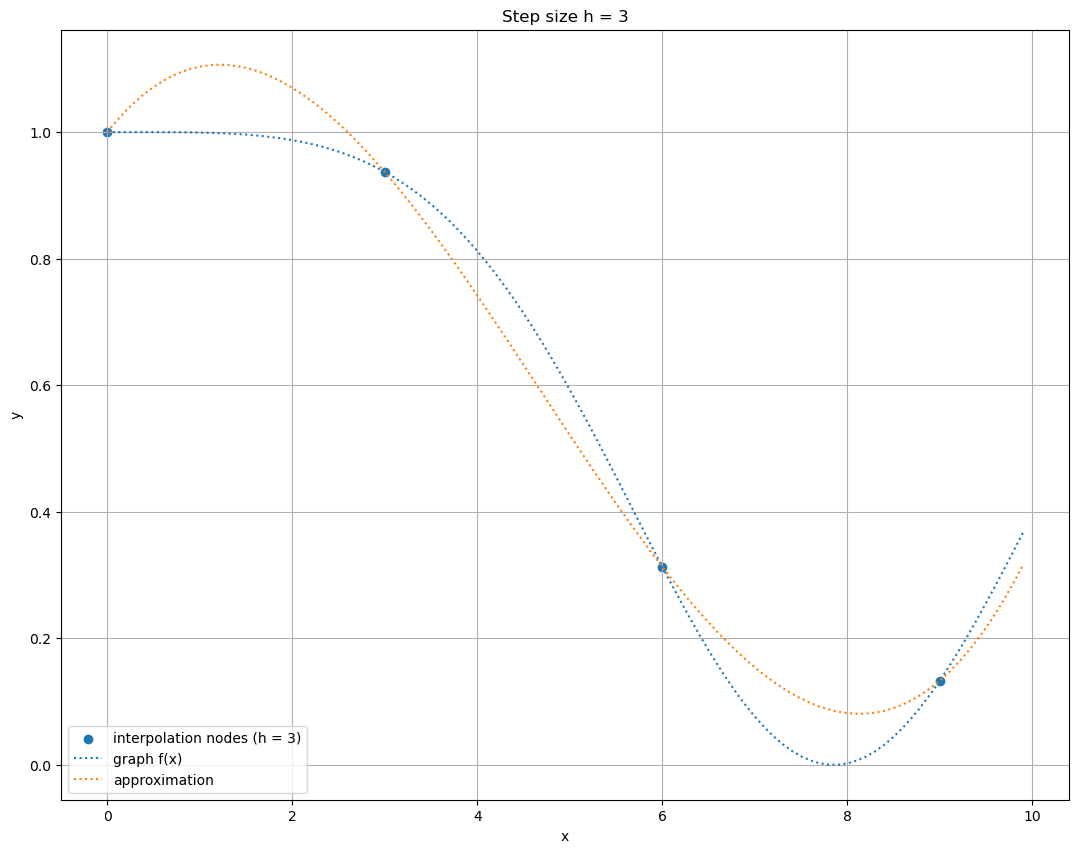

In [8]:
fig = plt.figure(figsize=(13,10)) 

# interpolation nodes
plt.scatter(x_data, y_data, label=f"interpolation nodes (h = {h})")

# f(x) graph
plt.plot(x, y, ':', label="graph f(x)")

# approximation
plt.plot(x_appr, y_appr, ':', label="approximation")

plt.title(f'Step size h = {h}')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc="lower left")
plt.show()

In [9]:
x_middle = middle_points(x_data)
y_middle = lagrange(x_middle, x_data, y_data)

print(y_middle)

[1.10142084 0.63227704 0.10478041]


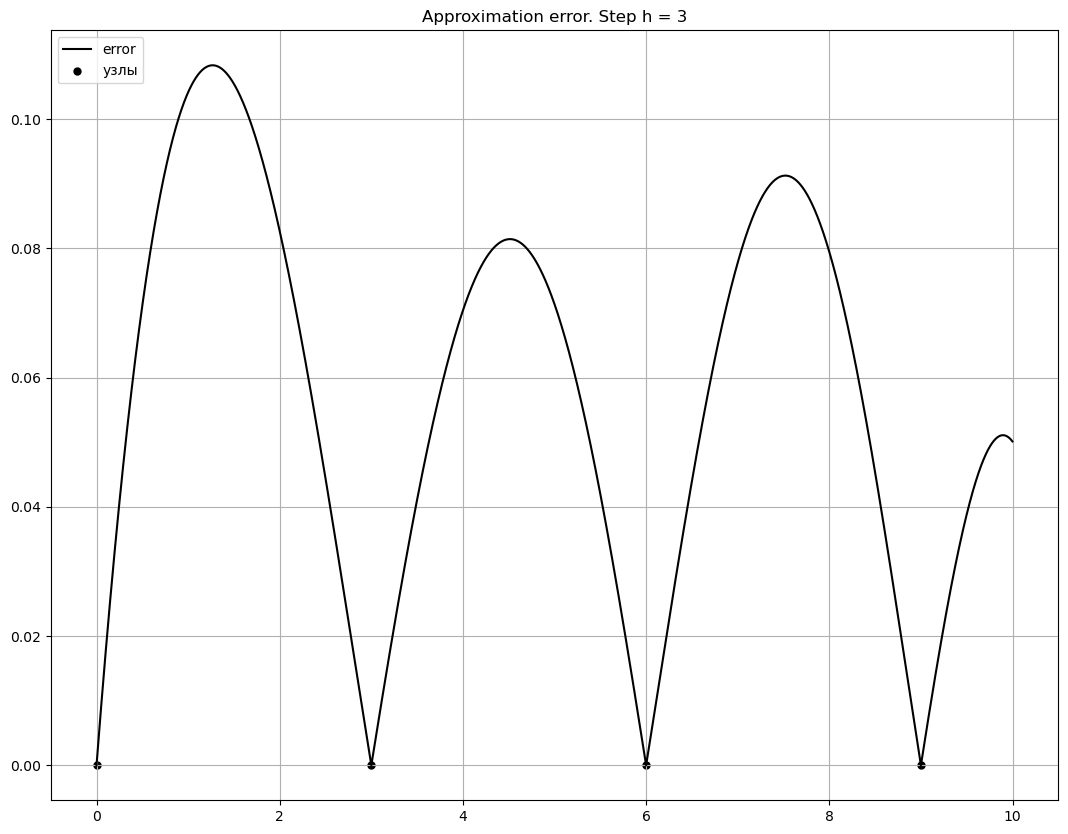

In [10]:
fig = plt.figure(figsize=(13,10)) 

x_error = np.arange(a, b, 0.001)
y_error = abs(lagrange(x_error, x_data, y_data) - function(x_error))

plt.title(f'Approximation error. Step h = {h}')
plt.plot(x_error, y_error, color="k", label='error')
plt.scatter(x_data, [0]*len(x_data), marker='.', s=100, color="k", label='узлы')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

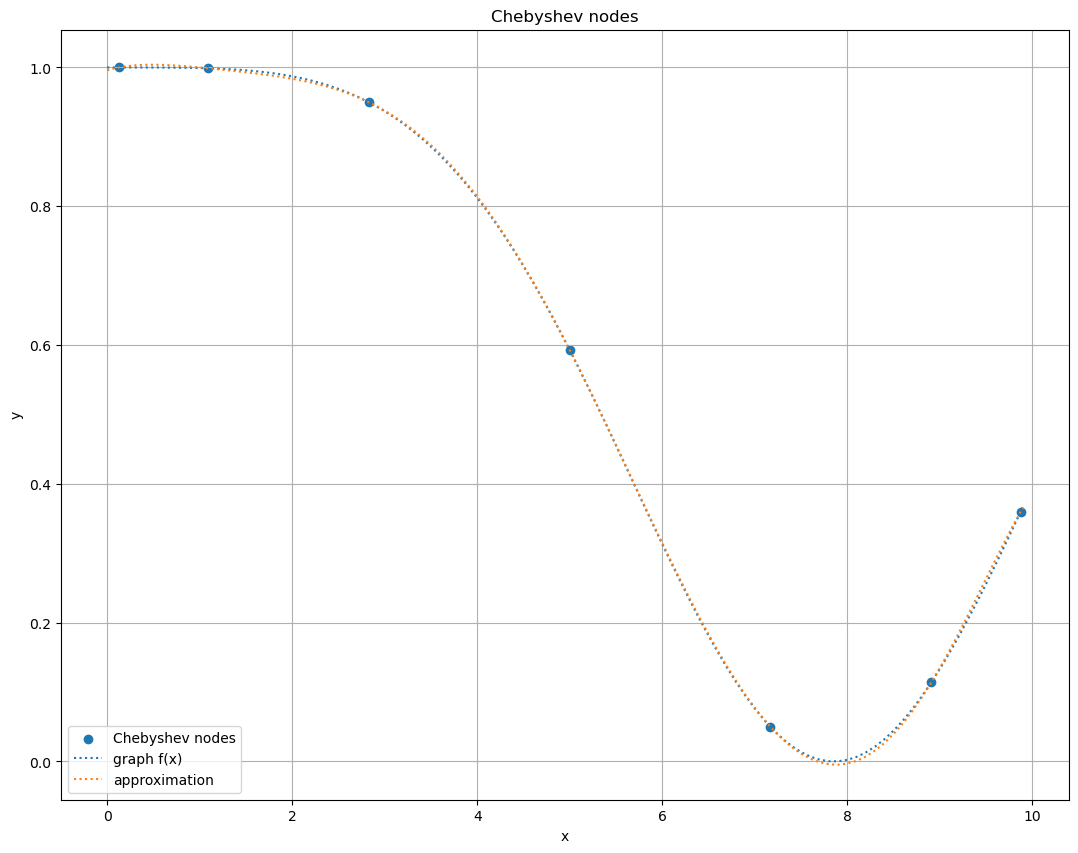

In [11]:
fig = plt.figure(figsize=(13,10)) 

#узлы Чебышева
plt.scatter(x_cheb, y_cheb, label=f"Chebyshev nodes")
#график f(x)
plt.plot(x, y, ':', label="graph f(x)")

x_appr2 = np.arange(a, b, 0.1)
y_appr2 = lagrange(x_appr2, x_cheb, y_cheb)

#приближение
plt.plot(x_appr2, y_appr2, ':', label="approximation")

plt.title(f'Chebyshev nodes')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc="lower left")
plt.show()

In [12]:
x_middle2 = middle_points(x_cheb)
y_middle2 = lagrange(x_middle2, x_cheb, y_cheb)

print(y_middle2)

[ 0.23431912 -0.00182311  0.29118749  0.82825789  0.98465092  1.00367601]


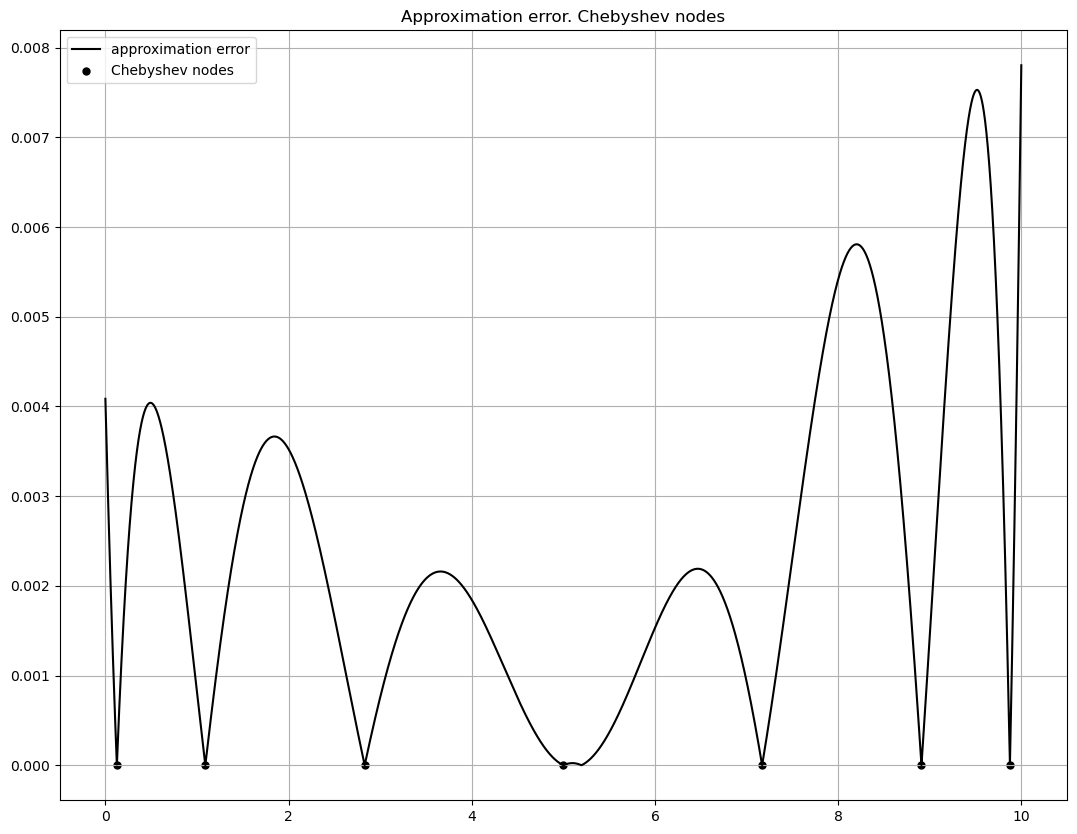

In [13]:
fig = plt.figure(figsize=(13,10)) 

x_error2 = np.arange(a, b, 0.001)
y_error2 = abs(lagrange(x_error2, x_cheb, y_cheb) - function(x_error2))

plt.title(f'Approximation error. Chebyshev nodes')
plt.plot(x_error2, y_error2, color="k", label='approximation error')
plt.scatter(x_cheb, [0]*len(x_cheb), marker='.', s=100, color="k", label='Chebyshev nodes')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()